### Abstract 

##### _Abstract overview of the notebook_

Atliq Grands owns several five-star hotels across India and has been operating in the hospitality industry for 20 years. They wanted to analyse the revenue generated by each of the hotels and understand the factors affecting that revenue.

**Clear Statement of Business Duties:** 

Analyse the revenue generated by each hotel in Atliq Grands and identify the factors affecting that revenue.

**Description of Data Source:**

* dim_date: Information about the date, month, and day type.
* dim_hotels: Information about hotels, including property ID, property name, category, and city.
* dim_rooms: Information about rooms, including room ID and room class.
* fact_aggregated_bookings: Aggregated booking data, including property ID, check-in date, room category, number of successful bookings, and room capacity.
* fact_bookings: Individual booking data, including booking ID, property ID, booking date, check-in date, check-out date, number of guests, room category, booking platform, rating given, booking status, revenue generated, and revenue realised.

### Acquaring and Loading Data

##### _Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results_

In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#using pandas library and 'read_csv' function to read Atliq Hospitality Data csv file as file already formated for us from Kaggle
dim_date=pd.read_csv("/kaggle/input/atliq-hospitality-data/dim_date.csv")
dim_hotels=pd.read_csv("/kaggle/input/atliq-hospitality-data/dim_hotels.csv")
dim_room=pd.read_csv("/kaggle/input/atliq-hospitality-data/dim_rooms.csv")
fact_aggregated_bookings=pd.read_csv("/kaggle/input/atliq-hospitality-data/fact_aggregated_bookings.csv")
fact_bookings=pd.read_csv("/kaggle/input/atliq-hospitality-data/fact_bookings.csv")

In [3]:
#checking type of every column in the dataset
print("Dim Date Data Types:")
print(dim_date.dtypes)
print("\nDim Hotels Data Types:")
print(dim_hotels.dtypes)
print("\nDim Rooms Data Types:")
print(dim_room.dtypes)
print("\nFact Aggregated Bookings Data Types:")
print(fact_aggregated_bookings.dtypes)
print("\nFact Bookings Data Types:")
print(fact_bookings.dtypes)

Dim Date Data Types:
date        object
mmm yy      object
week no     object
day_type    object
dtype: object

Dim Hotels Data Types:
property_id       int64
property_name    object
category         object
city             object
dtype: object

Dim Rooms Data Types:
room_id       object
room_class    object
dtype: object

Fact Aggregated Bookings Data Types:
property_id             int64
check_in_date          object
room_category          object
successful_bookings     int64
capacity                int64
dtype: object

Fact Bookings Data Types:
booking_id            object
property_id            int64
booking_date          object
check_in_date         object
checkout_date         object
no_guests              int64
room_category         object
booking_platform      object
ratings_given        float64
booking_status        object
revenue_generated      int64
revenue_realized       int64
dtype: object


From the results you shared, the data type of each column in the DataFrame appears to be correct according to the description given earlier. However, to ensure the analysis goes well, especially in merging operations and further analysis, some columns may need to be converted to more appropriate data types. For example, the date column which is currently of object type should be converted to datetime type.

In [4]:
# Convert date column to datetime type with default formatting
dim_date['date'] = pd.to_datetime(dim_date['date'])
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'])

The warning you received means that pd.to_datetime() cannot infer the date format automatically for multiple columns, so it uses dateutil to parse each element individually. This can slow down the parsing process and can cause inconsistencies if the date formats in the columns are not uniform.

To ensure consistent parsing and avoid this warning, you can specify the date format explicitly using the format parameter in pd.to_datetime().

In [5]:
# Checking the data type after conversion
print("Dim Date Data Types:\n", dim_date.dtypes)
print("\nFact Aggregated Bookings Data Types:\n", fact_aggregated_bookings.dtypes)
print("\nFact Bookings Data Types:\n", fact_bookings.dtypes)

Dim Date Data Types:
 date        datetime64[ns]
mmm yy              object
week no             object
day_type            object
dtype: object

Fact Aggregated Bookings Data Types:
 property_id                     int64
check_in_date          datetime64[ns]
room_category                  object
successful_bookings             int64
capacity                        int64
dtype: object

Fact Bookings Data Types:
 booking_id                   object
property_id                   int64
booking_date         datetime64[ns]
check_in_date        datetime64[ns]
checkout_date        datetime64[ns]
no_guests                     int64
room_category                object
booking_platform             object
ratings_given               float64
booking_status               object
revenue_generated             int64
revenue_realized              int64
dtype: object


In [6]:
# Display the first few rows of the date column to ensure the formatting is correct
print(dim_date.head())
print(fact_aggregated_bookings.head())
print(fact_bookings.head())

        date  mmm yy week no  day_type
0 2022-05-01  May 22    W 19   weekend
1 2022-05-02  May 22    W 19  weekeday
2 2022-05-03  May 22    W 19  weekeday
3 2022-05-04  May 22    W 19  weekeday
4 2022-05-05  May 22    W 19  weekeday
   property_id check_in_date room_category  successful_bookings  capacity
0        16559    2022-05-01           RT1                   25        30
1        19562    2022-05-01           RT1                   28        30
2        19563    2022-05-01           RT1                   23        30
3        17558    2022-05-01           RT1                   13        19
4        16558    2022-05-01           RT1                   18        19
         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558   2022-04-27    2022-05-01    2022-05-02   
1  May012216558RT12        16558   2022-04-30    2022-05-01    2022-05-02   
2  May012216558RT13        16558   2022-04-28    2022-05-01    2022-05-04   
3  May01221655

## Merged Data

In [7]:
# Merge fact_bookings with dim_hotels based on property_id
atliq = fact_bookings.merge(dim_hotels, on='property_id')
# Merge results with dim_rooms based on room_category
atliq = atliq.merge(dim_room, left_on='room_category', right_on='room_id')

Integrate Property Information: The fact_bookings table contains detailed information about each booking, such as booking date, check-in date, and revenue generated. However, this table only includes property_id as the hotel identifier. To get more information about each hotel, such as property_name, category, and city, we need to join this table with dim_hotels.

Adding Room Class Information: The fact_bookings table also includes room_category, which simply identifies the room type as RT1, RT2, etc. To find out more about the room class, such as whether the room is Standard, Elite, Premium, or Presidential, we need to merge this data with dim_rooms.

In [8]:
atliq.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,room_id,room_class
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,RT1,Standard
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,RT1,Standard
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,RT1,Standard
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,RT1,Standard
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,RT1,Standard


#### Check for the null values in each column

In [9]:
atliq.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
property_name            0
category                 0
city                     0
room_id                  0
room_class               0
dtype: int64

In this case, we see that the ratings_given column has many null values (as many as 77,907). For this case, replacing the null values with the average or median values may be a wise approach because:

* Deleting a large number of rows can reduce a lot of data that may still be useful.
* Replacing with the mean or median reduces the bias that may arise from replacing with a fixed value such as 0.

In [10]:
# Replace the null value in the ratings_given column with the median value
median_rating = atliq['ratings_given'].median()
atliq['ratings_given'].fillna(median_rating, inplace=True)

# Checking the null value again
print(atliq.isnull().sum())

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
property_name        0
category             0
city                 0
room_id              0
room_class           0
dtype: int64


## Revenue Analysis

In [11]:
# Functions to calculate total and average income
total_revenue = atliq.groupby(['property_id', 'property_name', 'room_class'])['revenue_realized'].sum().reset_index()
average_revenue = atliq.groupby(['property_id', 'property_name', 'room_class'])['revenue_realized'].mean().reset_index()
# Calculating total revenue by booking platform
platform_revenue = atliq.groupby('booking_platform')['revenue_realized'].sum().reset_index()

In [12]:
# Display total and average income results
print("Total Revenue:")
print(total_revenue)
print("\nAverage Income:")
print(average_revenue)
print("Revenue by Booking Platform:")
print(platform_revenue)

Total Revenue:
    property_id  property_name    room_class  revenue_realized
0         16558   Atliq Grands         Elite          14713524
1         16558   Atliq Grands       Premium           7246512
2         16558   Atliq Grands  Presidential           5036444
3         16558   Atliq Grands      Standard           9064692
4         16559  Atliq Exotica         Elite          33344208
..          ...            ...           ...               ...
95        19562      Atliq Bay      Standard          15573870
96        19563   Atliq Palace         Elite          25996680
97        19563   Atliq Palace       Premium          22621680
98        19563   Atliq Palace  Presidential           7554780
99        19563   Atliq Palace      Standard          12422865

[100 rows x 4 columns]

Average Income:
    property_id  property_name    room_class  revenue_realized
0         16558   Atliq Grands         Elite      11096.171946
1         16558   Atliq Grands       Premium      15160.066946

In [13]:
# Resolve duplicates before pivot
total_revenue_unique = total_revenue.drop_duplicates(subset=['property_name', 'room_class'])
average_revenue_unique = average_revenue.drop_duplicates(subset=['property_name', 'room_class'])

In [14]:
# Display total and average income results
print("Total Revenue:")
print(total_revenue_unique)
print("\nAverage Income:")
print(average_revenue_unique)

Total Revenue:
    property_id  property_name    room_class  revenue_realized
0         16558   Atliq Grands         Elite          14713524
1         16558   Atliq Grands       Premium           7246512
2         16558   Atliq Grands  Presidential           5036444
3         16558   Atliq Grands      Standard           9064692
4         16559  Atliq Exotica         Elite          33344208
5         16559  Atliq Exotica       Premium          35506608
6         16559  Atliq Exotica  Presidential          31882684
7         16559  Atliq Exotica      Standard          17714918
8         16560     Atliq City         Elite          18471600
9         16560     Atliq City       Premium          14660352
10        16560     Atliq City  Presidential           8261428
11        16560     Atliq City      Standard          13538798
12        16561      Atliq Blu         Elite          15889608
13        16561      Atliq Blu       Premium          19184256
14        16561      Atliq Blu  Presiden

## Data Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1400x800 with 0 Axes>

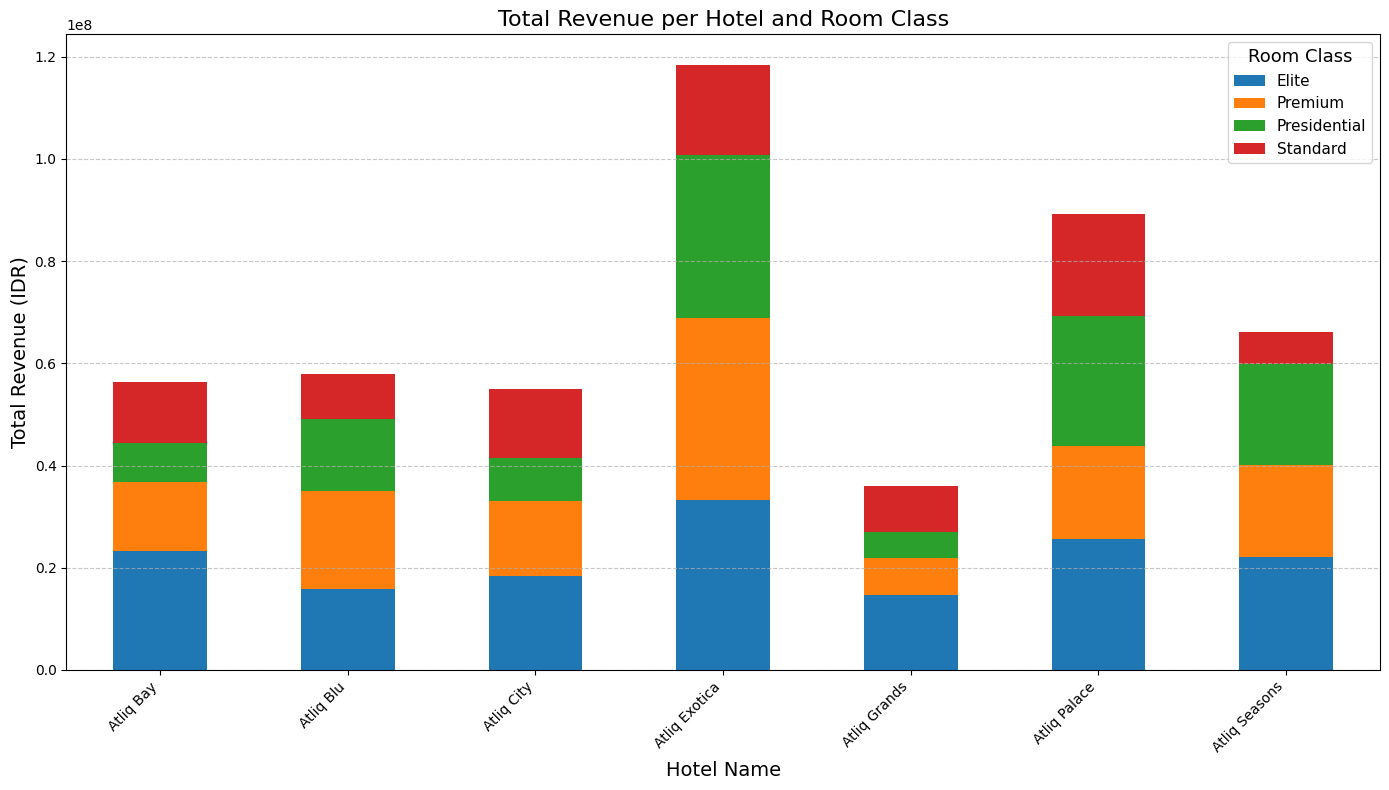

In [16]:
# Visualisation of total revenue
plt.figure(figsize=(14, 8))
total_revenue_pivot = total_revenue_unique.pivot(index='property_name', columns='room_class', values='revenue_realized')
total_revenue_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total Revenue per Hotel and Room Class', fontsize=16)
plt.xlabel('Hotel Name', fontsize=14)
plt.ylabel('Total Revenue (IDR)', fontsize=14)
plt.legend(title='Room Class', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

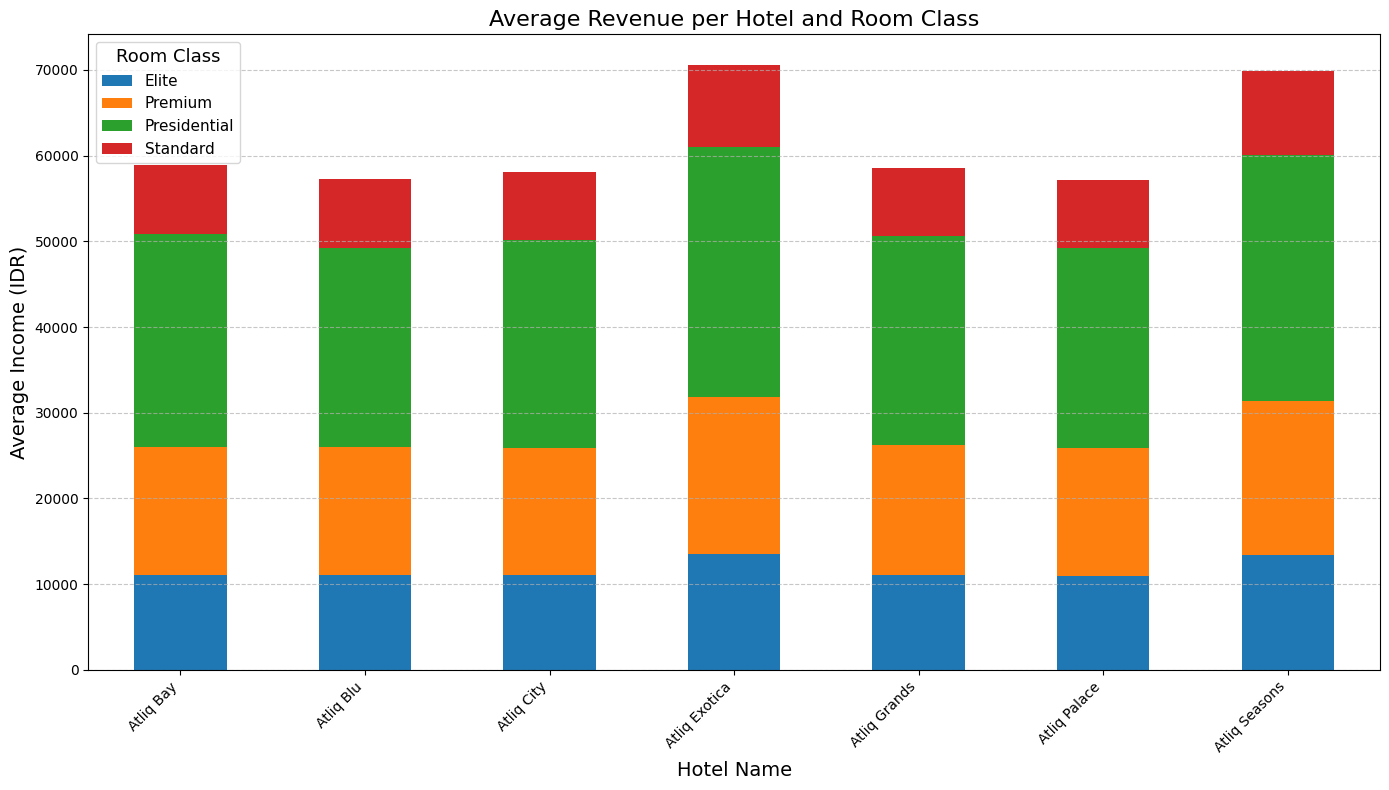

In [17]:
# Visualisation of average revenue
plt.figure(figsize=(14, 8))
average_revenue_pivot = average_revenue_unique.pivot(index='property_name', columns='room_class', values='revenue_realized')
average_revenue_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Average Revenue per Hotel and Room Class', fontsize=16)
plt.xlabel('Hotel Name', fontsize=14)
plt.ylabel('Average Income (IDR)', fontsize=14)
plt.legend(title='Room Class', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

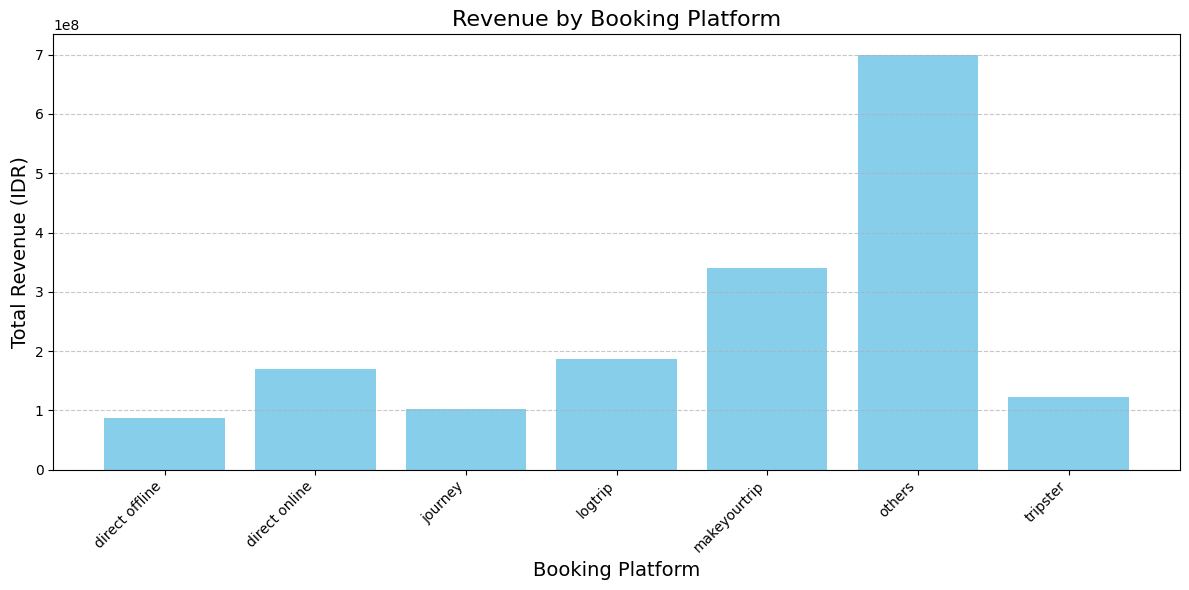

In [18]:
# Revenue visualisation by booking platform
plt.figure(figsize=(12, 6))
platform_revenue = atliq.groupby('booking_platform')['revenue_realized'].sum().reset_index()
plt.bar(platform_revenue['booking_platform'], platform_revenue['revenue_realized'], color='skyblue')
plt.title('Revenue by Booking Platform', fontsize=16)
plt.xlabel('Booking Platform', fontsize=14)
plt.ylabel('Total Revenue (IDR)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusions and Recommendations

**Conclusion:**

The revenue analysis of Atliq Grands hotels shows significant variations in financial performance across different hotels and room classes. The best performing hotel in terms of total revenue is Atliq Seasons, especially in the Elite and Premium room classes. In contrast, Atliq Grands, despite having some room classes with significant revenue, tends to have lower total revenue compared to other hotels such as Atliq Exotica and Atliq Bay. Analysis of average revenue per night shows that the Presidential room class generally has higher revenue than other room classes, both in the flagship hotels and across the network.

In terms of booking platforms, "makeyourtrip" and "others" are the two platforms with the largest revenue contribution, indicating customers' preference to use these platforms. Platforms such as "direct online" and "logtrip" also showed significant revenue contribution but not as much as the two largest platforms.

**Recommendations:**

1. **Focus on Premium and Elite Room Classes:**
   - Hotels such as Atliq Seasons and Atliq Exotica show excellent revenue in the Elite and Premium room classes. It is recommended to increase offers and promotions for these room classes in underperforming hotels, such as Atliq Grands and Atliq City, to increase appeal and revenue.

2. **Optimisation of Booking Platform:**
   - With "makeyourtrip" and "others" being the platforms with the highest revenue, it is important to do more cooperation and promotion through these platforms. Investing more in increasing visibility on these platforms can be profitable.

3. **Strategy Adjustment Based on Average Revenue:**
   - Although total and average revenue per night vary, hotels should focus on strategies that optimise revenue per night, especially for the Presidential room class which shows high revenue potential. More strategic rate planning and promotions for this class can increase profitability.

4. **Offer Evaluation and Adjustment:**
   - Conduct an in-depth evaluation of hotels that have lower revenues and consider adjustments in product offerings and pricing. In-depth analysis can help understand why some hotels are not performing as they should and find solutions to increase their revenue.

5. **Improving Customer Experience:**
   - Given the difference in average revenue per night, it is important to continue investing in customer experience and service quality, especially in lower performing hotels and room classes. Providing better service can help increase customer satisfaction and loyalty, which in turn can increase revenue.

By implementing these recommendations, Atliq can capitalise on their strengths across different hotels and room classes and increase overall revenue in a more targeted and strategic way.